In [1]:
%load_ext autoreload
%autoreload 2

import sys
import time
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/home/leechh/code/elo/Tools/')
from tools import *

In [2]:
new = pd.read_csv('/home/leechh/data/elo/new_merchant_transactions.csv')
his = dd.read_csv('/home/leechh/data/elo/historical_transactions.csv')

In [3]:
new.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [4]:
his.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [5]:
new.shape

(1963031, 14)

# authorized_flag

In [6]:
new.authorized_flag.value_counts()

Y    1963031
Name: authorized_flag, dtype: int64

In [8]:
his.authorized_flag.value_counts().compute()

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

In [56]:
his[his.authorized_flag == 'N'].head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
115,N,C_ID_4e6213e9bc,88,N,0,A,842,M_ID_22c9cfa265,-10,-0.730379,2017-04-07 12:58:09,1.0,16,37
132,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:27,1.0,16,16
148,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:26,1.0,16,16
168,N,C_ID_4e6213e9bc,333,N,0,A,605,M_ID_c2ae34c2ef,0,-0.664262,2018-02-20 10:57:50,1.0,9,2
213,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:33:31,1.0,16,34


# card_id

In [9]:
new.card_id.nunique()

290001

In [11]:
his.card_id.nunique().compute()

325540

# city_id

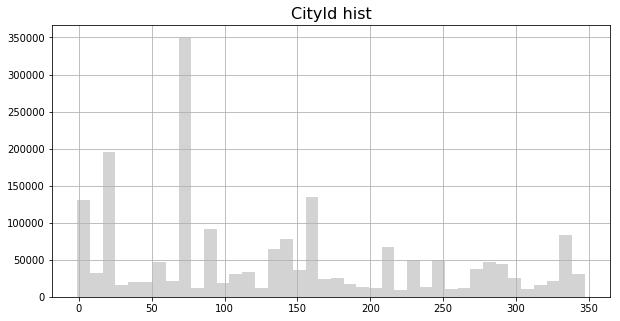

In [12]:
new.city_id.hist(bins=40, color='lightgray', figsize=[10,5])
plt.title('CityId hist',size=16)
plt.show()

In [13]:
new.city_id.dtype

dtype('int64')

**city_id:** 可以看出这是一个离散的，类别化的特征，如果我们不使用基于距离的算法，那么便不需要将其onehot编码,保留即可。

# category_1

In [14]:
new.category_1.value_counts()

N    1899935
Y      63096
Name: category_1, dtype: int64

In [16]:
his.category_1.value_counts().compute()

N    27028332
Y     2084029
Name: category_1, dtype: int64

**category_1：**这是一个bool类型特征，just 0,1 化处理

# installments

In [17]:
new.installments.value_counts()

 0      922244
 1      836178
-1       55922
 2       54729
 3       44750
 4       14815
 6       10389
 5        9296
 10       8899
 12       2850
 8        1555
 7         863
 9         478
 11         61
 999         2
Name: installments, dtype: int64

In [18]:
his.installments.value_counts().compute()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

**installments:** ，这是付款分了多少期的 feature ，建议保留

# category_3

In [19]:
new.category_3.value_counts()

A    922244
B    836178
C    148687
Name: category_3, dtype: int64

In [20]:
his.category_3.value_counts().compute()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [21]:
print(f'category_3 NaN data sum is: {sum(new.category_3.isnull())}')
new.category_3.fillna('nan', inplace=True)

category_3 NaN data sum is: 55922


category_3:建议将nan作为一个类别,然后将其数值化。

# merchant_category_id

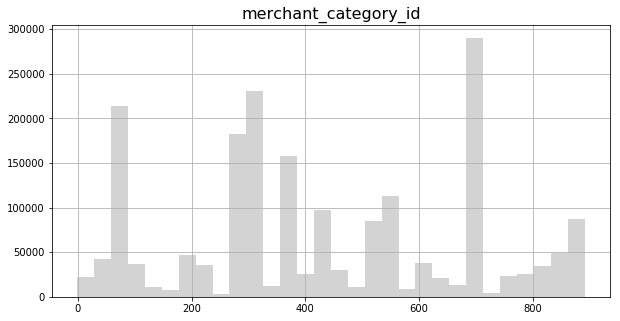

In [22]:
new.merchant_category_id.hist(bins=30, figsize=[10,5], color='lightgray')
plt.title('merchant_category_id', size=16)
plt.show()

**merchant_category_id:** 保留

# merchant_id

In [23]:
print(f'merchant_id number is:{new.merchant_id.nunique()}')

merchant_id number is:226129


**merchant_id:** 是与该账号进行交易的商家的id

# month_lag

In [24]:
new.month_lag.value_counts()

1    1027617
2     935414
Name: month_lag, dtype: int64

In [25]:
his.month_lag.value_counts().compute()

-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
-11    1007878
-12     791973
-13     689097
Name: month_lag, dtype: int64

**new.month_lag:** 经过验证，该特征指的是从该购买日到2018年2月之间的月份差。在该日期以后的交易被归到new 在之前的交易被归到his。

# purchase_amount

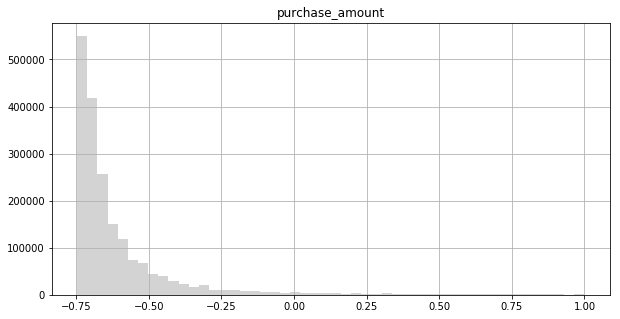

In [26]:
idx = (new.purchase_amount>-1) & (new.purchase_amount<1)
new.purchase_amount[idx].hist(bins=50, color='lightgray', figsize=[10,5])
plt.title('purchase_amount')
plt.show()

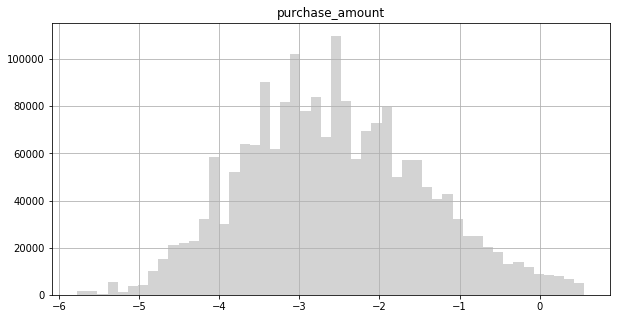

In [68]:
idx = (new.purchase_amount>-1) & (new.purchase_amount<1)
new.purchase_amount[idx].apply(lambda x: np.log(x+0.75)).hist(bins=50, color='lightgray', figsize=[10,5])
plt.title('purchase_amount')
plt.show()

这个应该指的是交易的金额，但是这个交易金额经过了某种处理，我们试试能不能将其恢复一下

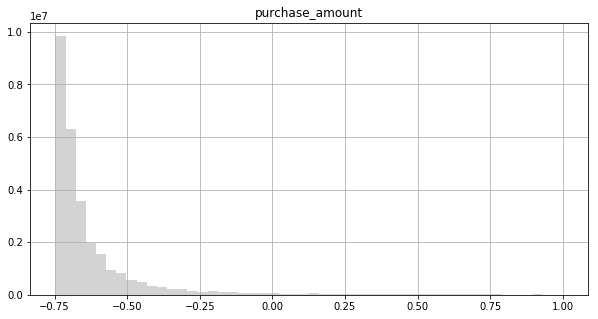

In [61]:
idx = (his.purchase_amount>-1) & (his.purchase_amount<1)
his.purchase_amount[idx].compute().hist(bins=50, color='lightgray', figsize=[10,5])
plt.title('purchase_amount')
plt.show()

# purchase_date

In [27]:
new['purchase_date'] = pd.to_datetime(new.purchase_date)

In [28]:
print(new.purchase_date.min(),' to ',new.purchase_date.max())

2017-03-01 03:24:51  to  2018-04-30 23:59:59


In [40]:
his['purchase_date'] = dd.to_datetime(his.purchase_date)

In [42]:
print(his.purchase_date.min().compute(),' to ', his.purchase_date.max().compute())

2017-01-01 00:00:08  to  2018-02-28 23:59:51


#### q:new 与 his 在时间上的联系

In [57]:
new[new.card_id == 'C_ID_4e6213e9bc']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1905835,Y,C_ID_4e6213e9bc,-1,N,0,A,528,M_ID_44b78002d2,2,-0.703331,2018-04-29 12:52:33,NaN,-1,25
1905836,Y,C_ID_4e6213e9bc,69,N,0,A,68,M_ID_e1a0b74f32,2,-0.649235,2018-04-29 18:13:17,1.0,9,27


In [58]:
his[his.card_id == 'C_ID_4e6213e9bc'].compute()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


In [59]:
his[(his.authorized_flag == 'N') & (his.card_id == 'C_ID_4e6213e9bc')].compute()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
115,N,C_ID_4e6213e9bc,88,N,0,A,842,M_ID_22c9cfa265,-10,-0.730379,2017-04-07 12:58:09,1.0,16,37
132,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:27,1.0,16,16
148,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:26,1.0,16,16
168,N,C_ID_4e6213e9bc,333,N,0,A,605,M_ID_c2ae34c2ef,0,-0.664262,2018-02-20 10:57:50,1.0,9,2
213,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:33:31,1.0,16,34
294,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:53:08,1.0,16,37
306,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:30,1.0,16,34
365,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:49,1.0,16,34
368,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:52:52,1.0,16,37


In [49]:
train = pd.read_csv('/home/leechh/data/elo/train.csv')
test = pd.read_csv('/home/leechh/data/elo/test.csv')

In [54]:
test[test.card_id == 'C_ID_4e6213e9bc']

,first_active_month,card_id,feature_1,feature_2,feature_3
7134,2016-06,C_ID_4e6213e9bc,3,3,1


In [55]:
train[train.card_id == 'C_ID_4e6213e9bc']

,first_active_month,card_id,feature_1,feature_2,feature_3,target


In [ ]:
我们可以看到，new

# category_2

In [29]:
new.category_2.value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

In [30]:
his.category_2.value_counts().compute()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [31]:
sum(new.category_2.isnull())

111745

In [33]:
sum(his.category_2.isnull().compute())

2652864

onehot

# state_id

In [34]:
new.state_id.nunique()

25

In [35]:
his.state_id.nunique().compute()

25

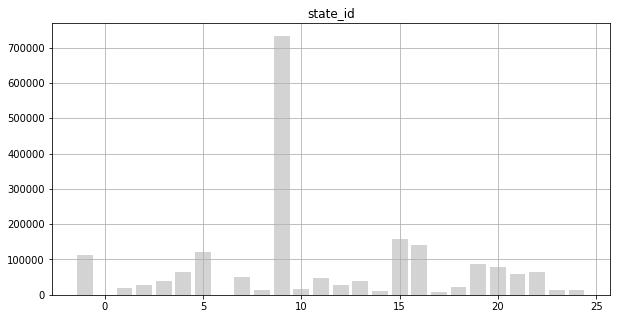

In [36]:
val = new.state_id.value_counts()
plt.figure(figsize=[10,5])
plt.title('state_id')
plt.bar(val.index, val, color='lightgray')
plt.grid()
plt.show()

**state_id:** 该特征为州ID，可能的话，onehot

# subsector_id

In [37]:
new.subsector_id.nunique()

41

In [38]:
his.subsector_id.nunique().compute()

41

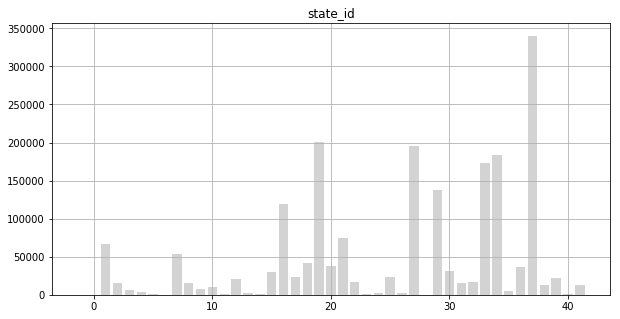

In [39]:
val = new.subsector_id.value_counts()
plt.figure(figsize=[10,5])
plt.title('state_id')
plt.bar(val.index, val, color='lightgray')
plt.grid()
plt.show()

**subsector_id:** 这个应该是支付的类别。onehot